# Dimensionality Reduction

### Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

### Step 2: Import the dataset

In [2]:
dataset = pd.read_csv('winequalityN.csv')
dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Dimension Reduction Technique #1 : Missing Value Ratio

In [3]:
#check percentages of null values in our dataset
null_percentages = dataset.isnull().sum()/len(dataset)*100

In [4]:
#save column names in a variable 
features = dataset.columns
feature = []
    
for i in range(0, len(null_percentages)):
    if null_percentages[i] <= 0.20:                                 #setting the threshold at 20%
        feature.append(features[i])



In [5]:
print(len(feature))
print(feature)


13
['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [6]:
#check the percentage of rows that have null values 

(dataset.isnull().sum().sum()/(dataset.shape[0]*dataset.shape[1]))*100

0.04499117936088846

In [7]:
#because the percentage of null values is really low, we can drop these rows
dataset = dataset.dropna(axis = 0)

In [8]:
(dataset.isnull().sum().sum()/(dataset.shape[0]*dataset.shape[1]))*100

0.0

### Dimension Reduction Technique #2 : Low Variance Filter

In [9]:
dataset.var()

C:\Users\nisha\AppData\Local\Temp\ipykernel_38144\2458428038.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.var()


fixed acidity              1.684578
volatile acidity           0.027106
citric acid                0.021098
residual sugar            22.627638
chlorides                  0.001230
free sulfur dioxide      315.375528
total sulfur dioxide    3195.271901
density                    0.000009
pH                         0.025808
sulphates                  0.022175
alcohol                    1.423555
quality                    0.762629
dtype: float64

In [10]:
#because density has little to no change/variance, we can safely drop this dimension
dataset = dataset.drop(['density'], axis =1)

In [11]:
dataset.var()

C:\Users\nisha\AppData\Local\Temp\ipykernel_38144\2458428038.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.var()


fixed acidity              1.684578
volatile acidity           0.027106
citric acid                0.021098
residual sugar            22.627638
chlorides                  0.001230
free sulfur dioxide      315.375528
total sulfur dioxide    3195.271901
pH                         0.025808
sulphates                  0.022175
alcohol                    1.423555
quality                    0.762629
dtype: float64

### Dimension Reduction Technique #3 : Highest Correlation Factor

In [12]:
dataset.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.221066,0.323744,-0.113442,0.299104,-0.283485,-0.330543,-0.251121,0.301263,-0.096190,-0.076174
volatile acidity,0.221066,1.000000,-0.377512,-0.196677,0.377995,-0.353402,-0.414729,0.260134,0.225656,-0.039528,-0.266677
citric acid,0.323744,-0.377512,1.000000,0.142324,0.039412,0.132271,0.194398,-0.327860,0.059070,-0.010056,0.084926
residual sugar,-0.113442,-0.196677,0.142324,1.000000,-0.128814,0.403449,0.495684,-0.266481,-0.185616,-0.359132,-0.034654
chlorides,0.299104,0.377995,0.039412,-0.128814,1.000000,-0.195428,-0.279602,0.044653,0.396240,-0.257664,-0.200553
free sulfur dioxide,-0.283485,-0.353402,0.132271,0.403449,-0.195428,1.000000,0.721476,-0.145164,-0.188947,-0.179477,0.054924
total sulfur dioxide,-0.330543,-0.414729,0.194398,0.495684,-0.279602,0.721476,1.000000,-0.237204,-0.275878,-0.264385,-0.041598
pH,-0.251121,0.260134,-0.327860,-0.266481,0.044653,-0.145164,-0.237204,1.000000,0.190864,0.120473,0.018403
sulphates,0.301263,0.225656,0.059070,-0.185616,0.396240,-0.188947,-0.275878,0.190864,1.000000,-0.004116,0.039054
alcohol,-0.096190,-0.039528,-0.010056,-0.359132,-0.257664,-0.179477,-0.264385,0.120473,-0.004116,1.000000,0.444637


<function matplotlib.pyplot.show(close=None, block=None)>

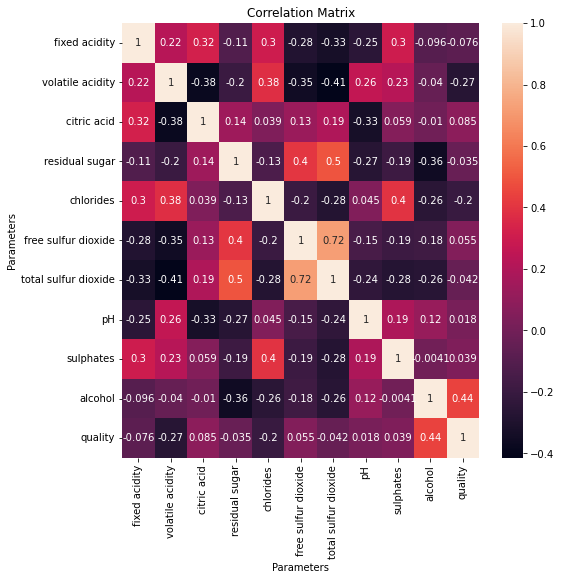

In [13]:
#making a heatmap with Seaborn

plt.figure(figsize = (8,8))
sns.heatmap(dataset.corr(), annot = True)
plt.title('Correlation Matrix')
plt.xlabel('Parameters')
plt.ylabel('Parameters')
plt.show

In [14]:
#since free sulfur dioxide and total sulfur dioxide are highly correlated, we can drop one of these dimensions
dataset = dataset.drop(['total sulfur dioxide'], axis =1)

In [15]:
dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,3.19,0.40,9.9,6


### Dimension Reduction Technique #4 : Random Forest 

In [16]:
#in order to use the random forest regressor we need to hot encode our text data to numeric data

dataset = dataset.replace('red', 0)
dataset = dataset.replace('white', 1)
dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,3.19,0.40,9.9,6


In [17]:
#in order to use the random froest regressor function we have to remove our target variable from our dataset

df = dataset.drop(['quality'], axis =1)

df.shape

(6463, 10)

In [18]:
#import randomForestRegressor method from sklearn

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(df, dataset.quality)

RandomForestRegressor(max_depth=10, random_state=1)

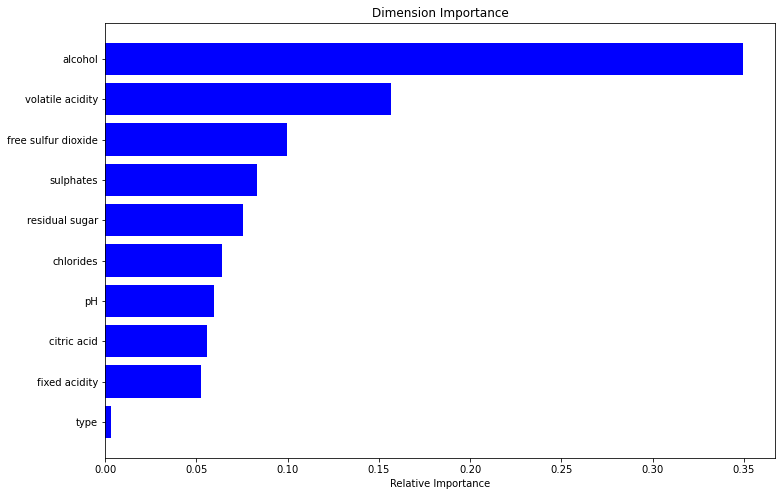

In [19]:
#build the graph to check the dimensions importance

features = df.columns
importance = model.feature_importances_
indices = np.argsort(importance)[:]                         #top 10 dimensions

plt.figure(figsize=(12,8))
plt.title('Dimension Importance')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [20]:
#Since type is the least important, we can drop this from our dataset

df = df.drop(['type'], axis =1)


In [21]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,3.19,0.40,9.9


### Dimension Reduction Technique #5 : Backward Feature Elimination

In [22]:
#import the RFE library from sklearn

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lreg = LinearRegression()
rfe = RFE(lreg, n_features_to_select=7)
rfe = rfe.fit(df, dataset.quality)

In [23]:
#check the names of the remaining dimensions

x_rfe = df[df.columns[rfe.support_]]
print(x_rfe.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')


### Dimension Reduction Technique #6 : Forward Feature selection

In [45]:
#import the libraries from sklearn for FFS

from sklearn.feature_selection import f_regression
ffs = f_regression(x_rfe, dataset.quality)

#take the top most important variables after the forward selection process
final_features = []

for i in range(0, len(x_rfe.columns)):
    if ffs[0][i] >= 50:
        final_features.append(x_rfe.columns[i])

In [47]:
final_features

['volatile acidity', 'chlorides', 'alcohol']

In [37]:
ffs

(array([  37.70839697,  494.66521059,   46.93816875,  270.76207175,
           2.18883258,    9.86928221, 1592.11684775]),
 array([8.70282789e-010, 1.16990986e-105, 8.00351769e-012, 1.24829208e-059,
        1.39063398e-001, 1.68820321e-003, 2.01885521e-311]))

In [52]:
x_rfe.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')